In [1]:
# import all necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.signal as signal
from IPython import display
import time

In [2]:
# load the data
db_data = pd.read_excel("LGS#1_2021.xlsx", sheet_name="LGS#1 2021")

In [3]:
# select range of data (if necessary)
start_time = pd.to_datetime('2021-01-20 00:00:01')
end_time = pd.to_datetime('2021-03-30 00:00:01')

db_data_observed = db_data[(db_data['TimeStamp']>=start_time) & (db_data['TimeStamp']<=end_time)]
db_data_observed

,TimeStamp,Active Power (MW),Grid (Aux: 0 & FCE:1),Reactive Power (MVAr),Exc Voltage (Volt),Exc Current (A),V Phase 1 (Volt),V Phase 2 (Volt),V Phase 3 (Volt),Current Phase 1 (kA),...,LGB Metal Temp 2,LGB Oil Temp,Gen air Cooler Air Otlet Temp,Gen air Cooler Water Inlet Temp,Gen air Cooler Water Otlet Temp,Gen Cooler Water Flow (LPM),UGB Cooling Water Flow (LPM),LGB Cooling Water Flow (LPM),Lower Canal Level (msAL),TailRace Level (msAL)
456,2021-01-20 00:03:08,9.43,NaN,11.79,111.59,616.35,10.71,10.72,10.79,0.00,...,46.64,62.41,38.67,44.67,43.63,3738.80,32.35,1268.25,313.45,166.22
457,2021-01-20 01:03:08,9.43,NaN,11.81,106.41,614.35,10.71,10.71,10.79,0.00,...,46.51,62.13,38.82,44.82,43.79,3710.71,32.20,1261.53,313.45,166.25
458,2021-01-20 02:03:09,9.43,NaN,11.83,103.22,616.48,10.71,10.70,10.77,0.00,...,46.39,62.00,38.97,44.97,43.96,3715.06,32.17,1261.97,313.44,166.28
459,2021-01-20 03:03:09,40.24,NaN,10.56,115.08,654.89,10.71,10.69,10.76,0.00,...,46.26,62.00,43.63,50.12,48.33,3704.20,32.31,1256.09,313.43,166.30
460,2021-01-20 04:03:09,39.36,NaN,10.54,115.06,651.39,10.71,10.68,10.74,0.00,...,46.14,62.00,44.80,51.00,49.88,3719.95,32.12,1255.68,313.42,166.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2021-03-29 19:14:26,44.95,NaN,20.36,141.77,747.60,10.96,10.86,10.88,6.00,...,53.00,69.00,63.83,67.00,64.64,3796.91,36.11,1283.40,314.11,166.37
2108,2021-03-29 20:14:26,55.23,NaN,28.57,119.36,789.38,10.89,10.66,11.19,6.00,...,53.00,69.00,64.41,67.40,64.91,3751.65,35.74,1271.83,314.12,166.38
2109,2021-03-29 21:14:27,49.13,NaN,21.18,126.52,736.73,11.14,10.64,11.05,6.00,...,53.00,69.00,66.00,69.00,66.00,3779.28,35.91,1275.65,314.12,166.38
2110,2021-03-29 22:14:27,58.98,NaN,23.26,135.89,782.82,10.74,10.79,11.08,6.22,...,53.00,69.00,66.17,69.00,66.61,3798.69,36.25,1281.89,314.14,166.39


/tmp/ipykernel_6202/3218125219.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 50))


<Figure size 640x480 with 0 Axes>

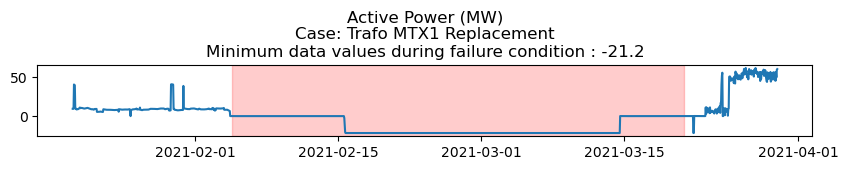

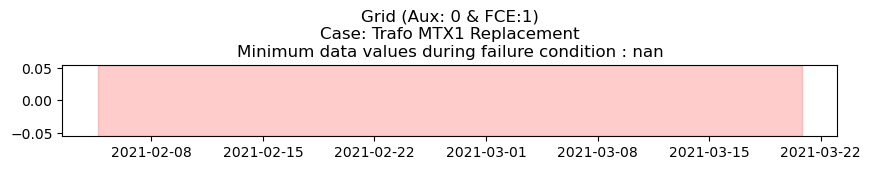

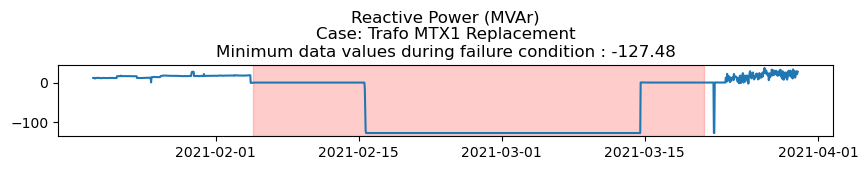

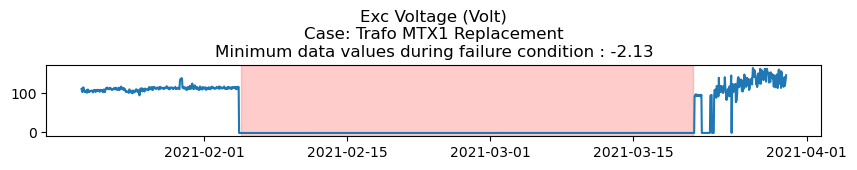

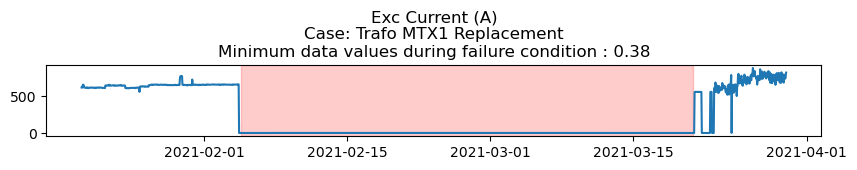

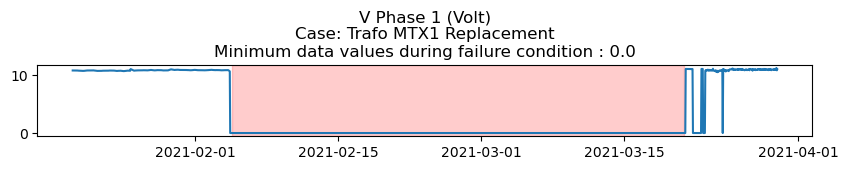

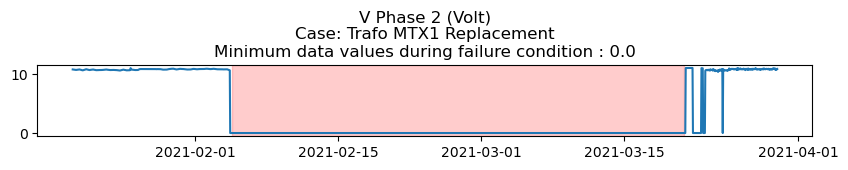

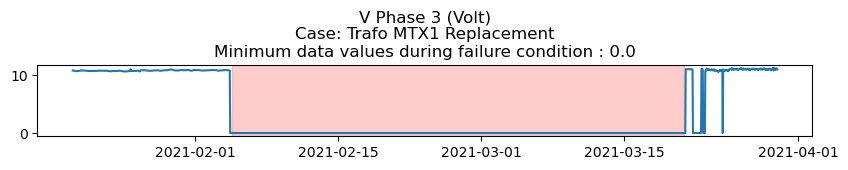

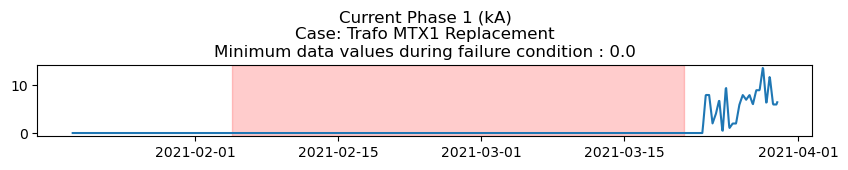

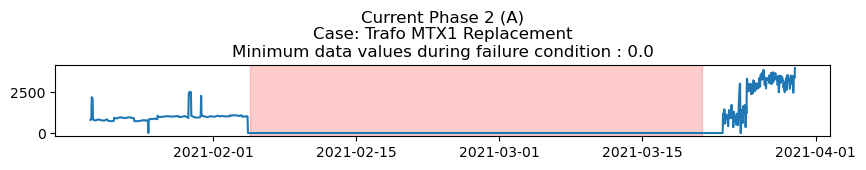

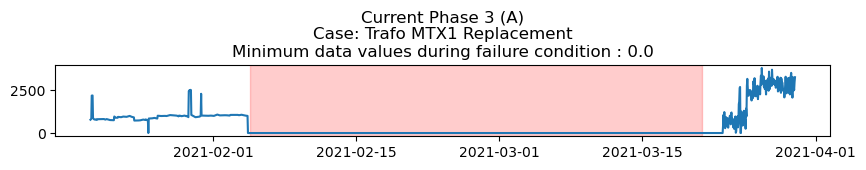

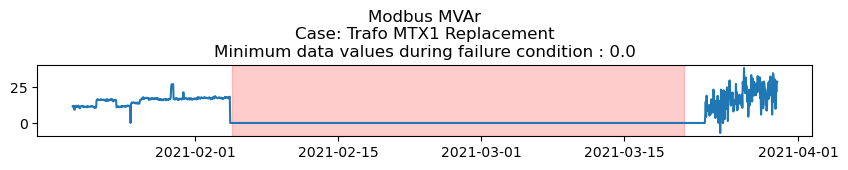

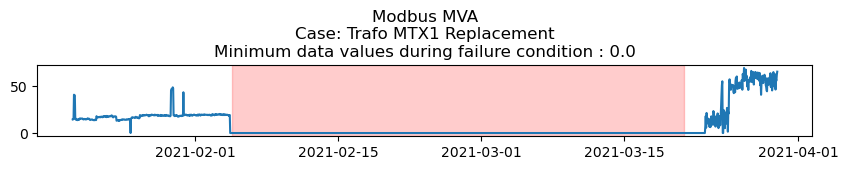

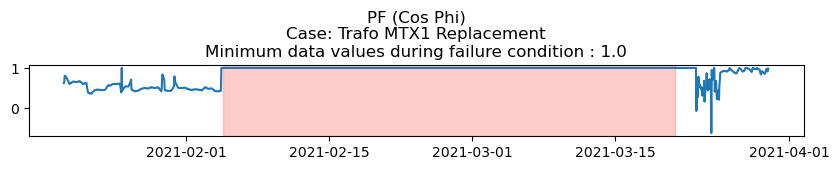

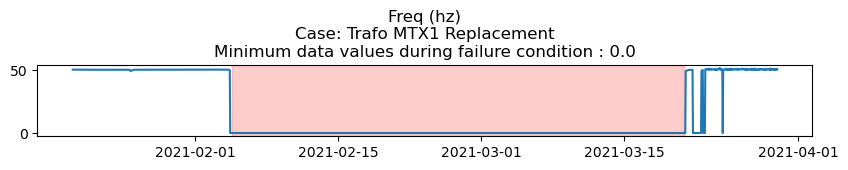

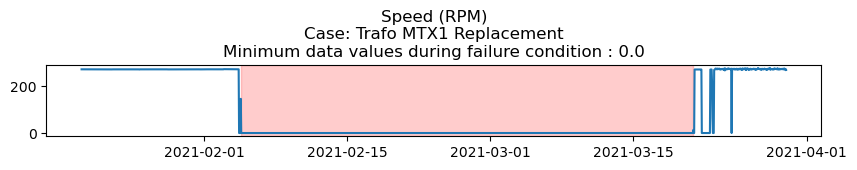

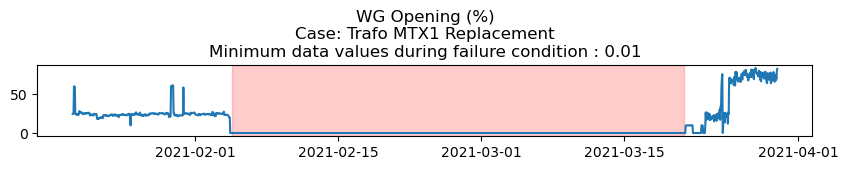

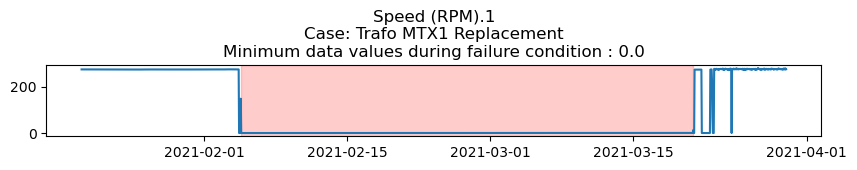

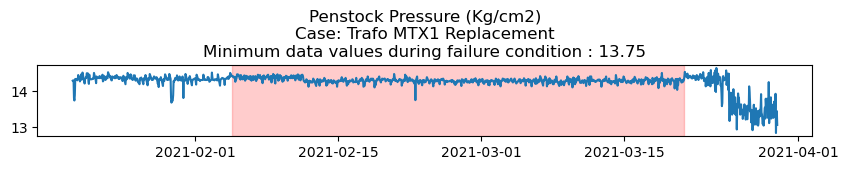

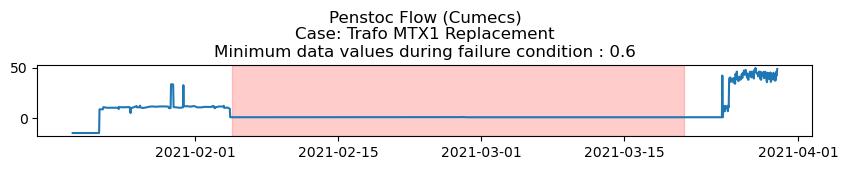

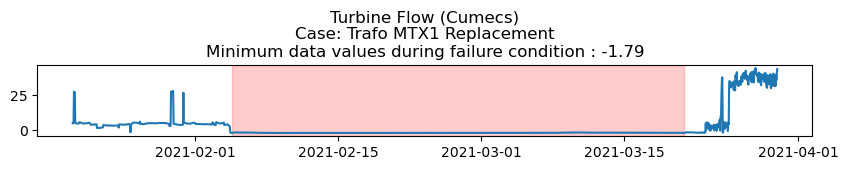

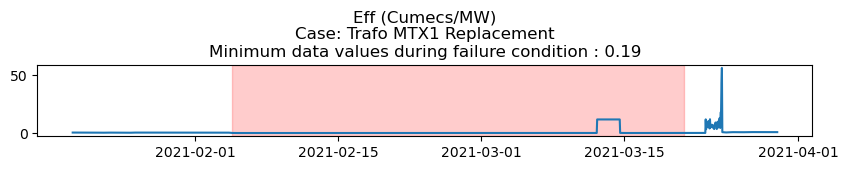

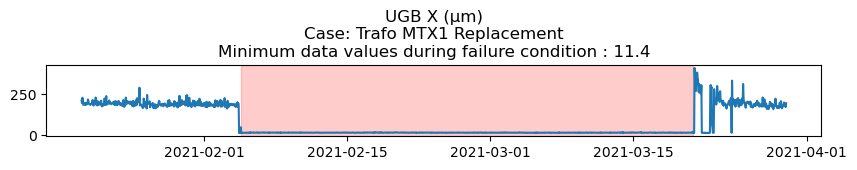

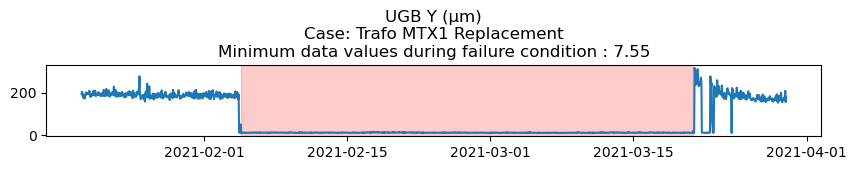

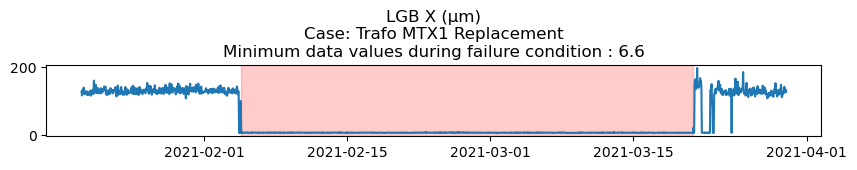

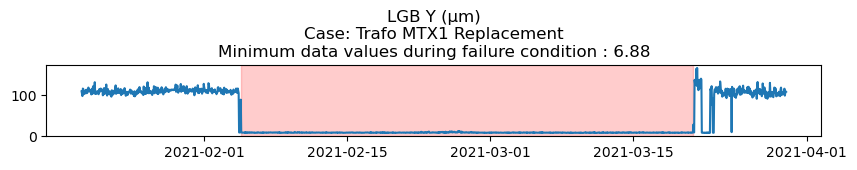

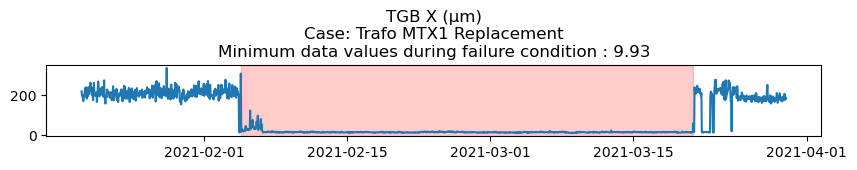

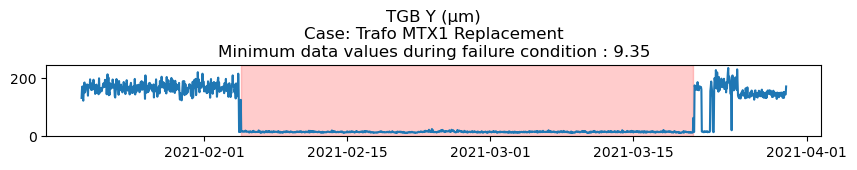

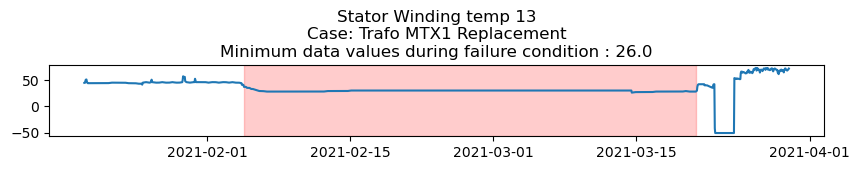

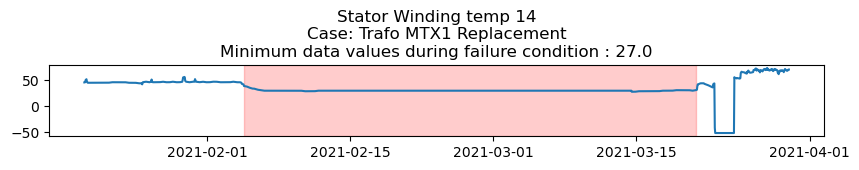

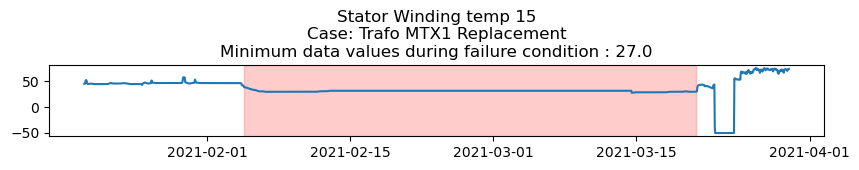

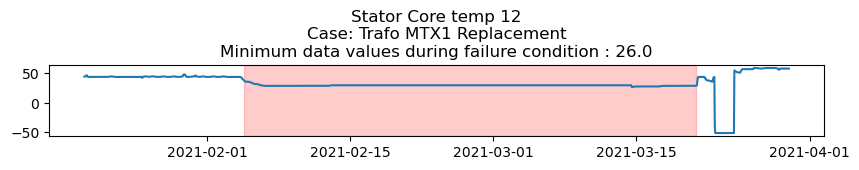

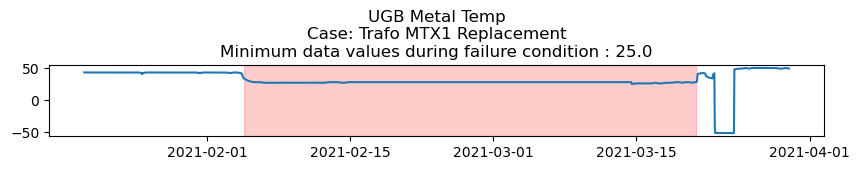

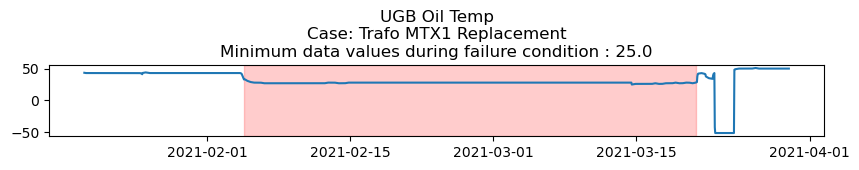

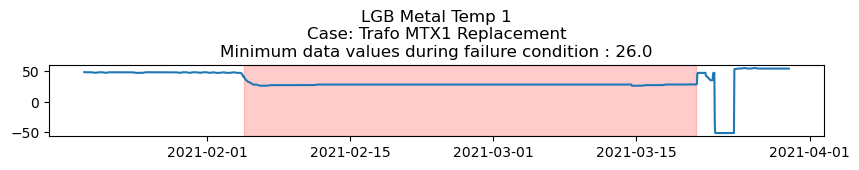

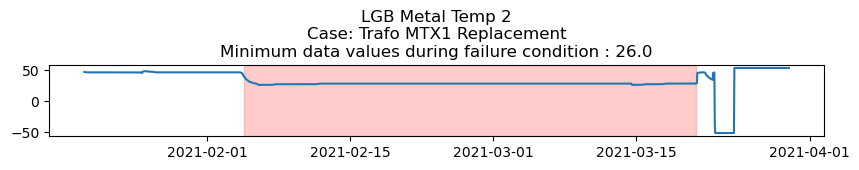

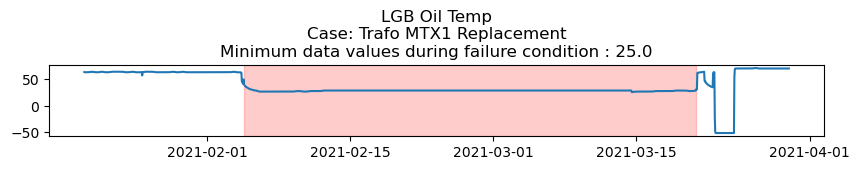

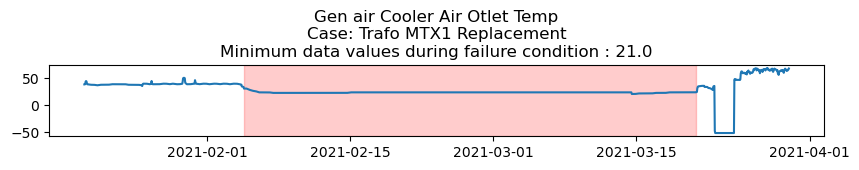

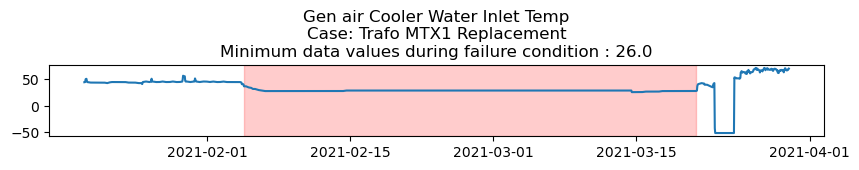

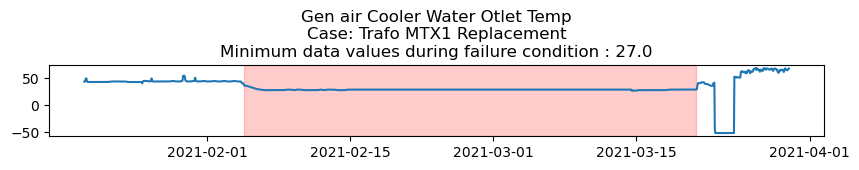

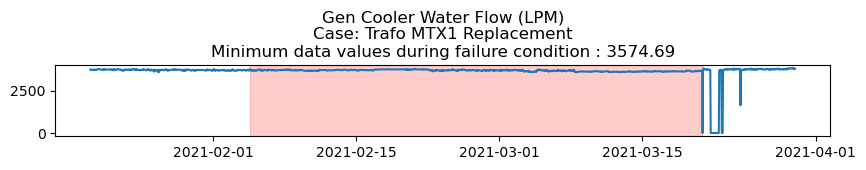

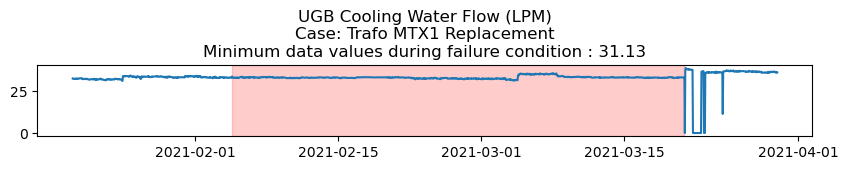

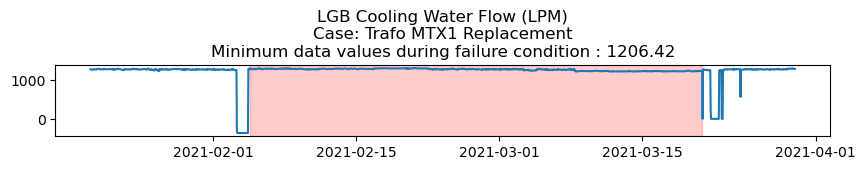

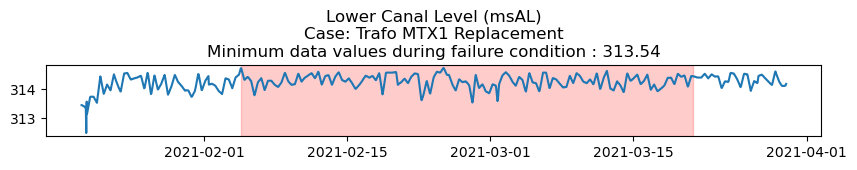

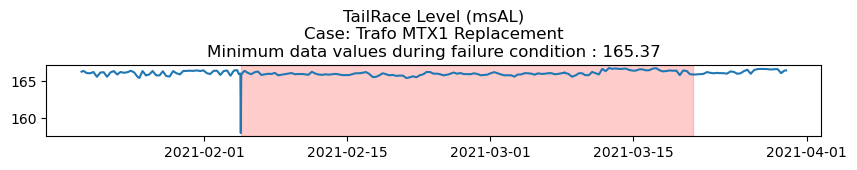

In [4]:
def calculate_average(data):
    start_time = pd.to_datetime('2021-02-04 15:05:00')
    end_time = pd.to_datetime('2021-03-20 00:00:01')
    
    average = data[(data['TimeStamp']>=start_time) & (data['TimeStamp']<=end_time)]
    average = average.iloc[:,1].min()    

    return np.round(average,3) 

def plot_data(data):
    for i in range(len(data.columns)-1):
        fig = plt.figure(figsize=(10, 50))
        ax = fig.add_subplot(len(data.columns)-1, 1, i+1)
        ax.plot(data.iloc[:,0], data.iloc[:,i+1])
        ax.axvspan(
           '2021-02-04 15:05:00',
           '2021-03-20 20:00:01',
           alpha=0.2,
           color='red'
        )

        failure_data = data.iloc[:, [0,i+1]]
        avg = calculate_average(failure_data)

        ax.set_title(data.iloc[:,i+1].name + "\nCase: Trafo MTX1 Replacement" + "\nMinimum data values during failure condition : " + str(avg))

fig = plt.figure()

plot_data(db_data_observed)